In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## 1. Read in Image, Grayscale

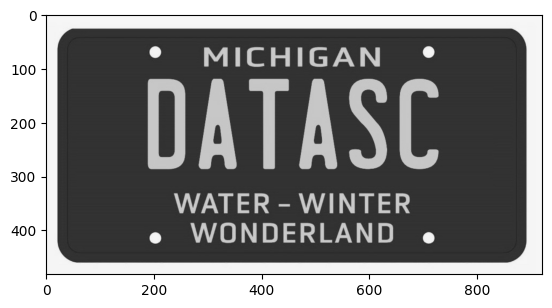

In [2]:
img = cv2.imread('../data/generated3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

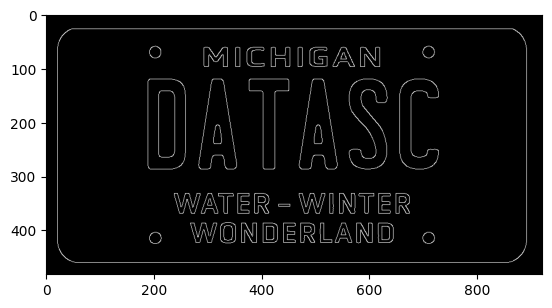

In [3]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 20, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find contours and apply masks

In [4]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [5]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [6]:
contour

array([[[588, 121]],

       [[589, 120]],

       [[608, 120]],

       [[609, 121]],

       [[612, 121]],

       [[613, 122]],

       [[615, 122]],

       [[616, 123]],

       [[617, 123]],

       [[618, 124]],

       [[619, 124]],

       [[621, 126]],

       [[622, 126]],

       [[626, 130]],

       [[626, 131]],

       [[629, 134]],

       [[629, 135]],

       [[630, 136]],

       [[630, 137]],

       [[631, 138]],

       [[631, 140]],

       [[632, 141]],

       [[632, 144]],

       [[633, 145]],

       [[633, 152]],

       [[634, 153]],

       [[634, 156]],

       [[633, 157]],

       [[633, 160]],

       [[629, 164]],

       [[617, 164]],

       [[614, 161]],

       [[614, 160]],

       [[613, 159]],

       [[613, 152]],

       [[612, 151]],

       [[612, 148]],

       [[611, 147]],

       [[611, 145]],

       [[608, 142]],

       [[607, 142]],

       [[606, 141]],

       [[604, 141]],

       [[603, 140]],

       [[594, 140]],

       [[5

In [7]:
location

In [8]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/drawing.cpp:2433: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'fillPoly'


In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR to Read Text

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

## 5. Render Result

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), 
                  thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))